In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [86]:
p_2016 = 'data/p4v2016.xls'
gdp_per = 'gdp_per_capita.xlsx'
data_2016 = pd.read_excel(p_2016, sheetname=0)
data_gdp = pd.read_excel(gdp_per, sheetname=0)

In [87]:
data_2016.head(3)

,cyear,ccode,scode,country,year,flag,fragment,democ,autoc,polity,...,interim,bmonth,bday,byear,bprec,post,change,d4,sf,regtrans
0,7001800,700,AFG,Afghanistan,1800,0,NaN,1,7,-6,...,NaN,1.0,1.0,1800.0,1.0,-6.0,88.0,1.0,NaN,NaN
1,7001801,700,AFG,Afghanistan,1801,0,NaN,1,7,-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7001802,700,AFG,Afghanistan,1802,0,NaN,1,7,-6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
data_gdp.head(3)

,Country,Currency,Year,Per capita GDP
0,Afghanistan,US$,1970,157.258461
1,Afghanistan,US$,1971,160.443153
2,Afghanistan,US$,1972,136.175612


In [89]:
time_range = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2013, 2014, 2015]
only_africa = ["Angola", "Gabon", "Nigeria", "Benin", "Gambia, The", "Rwanda", "Guinea-Bissau",
   "Botswana", "Ghana", "São Tomé and Principe", "Burkina Faso", "Guinea", "Senegal", "Burundi", "Seychelles", "Cabo Verde", "Kenya", "Sierra Leone", "Cameroon", "Lesotho", "Somalia", "Central African Republic", "Liberia", "South Africa", "Chad", "Madagascar", "Comoros", "Malawi", "Sudan", "Congo, Dem. Rep.", "Mali", "Swaziland", "Congo, Rep", "Mauritania", "Tanzania", "Côte d'Ivoire", "Mauritius", "Togo", "Equatorial Guinea", "Mozambique", "Uganda", "Eritrea" "Namibia", "Zambia", "Ethiopia", "Niger", "Zimbabwe"]


In [97]:
len(only_africa)

46

In [91]:
data_2016 = data_2016.rename(columns={'country': 'Country', 'year': 'Year'})

In [92]:
merged_data = pd.merge(left=data_gdp, right=data_2016, how='left', on=['Country', 'Year'])

In [93]:
merged_data.head()

,Country,Currency,Year,Per capita GDP,cyear,ccode,scode,flag,fragment,democ,...,interim,bmonth,bday,byear,bprec,post,change,d4,sf,regtrans
0,Afghanistan,US$,1970,157.258461,7001970.0,700.0,AFG,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,US$,1971,160.443153,7001971.0,700.0,AFG,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,US$,1972,136.175612,7001972.0,700.0,AFG,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,US$,1973,144.173945,7001973.0,700.0,AFG,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,US$,1974,175.027098,7001974.0,700.0,AFG,0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
final_merged = merged_data[(merged_data['Year'].isin(time_range)) & (merged_data['Country'].isin(only_africa))]
#final_merged['Year'] = pd.to_datetime(final_merged['Year'])
final_merged.index = pd.RangeIndex(len(final_merged.index))
final_merged['Region'] = 'SSA'

In [102]:
final_merged['Country'].unique()

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', "Côte d'Ivoire", 'Equatorial Guinea', 'Ethiopia',
       'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mauritius', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Sudan',
       'Swaziland', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe'], dtype=object)

In [96]:
final_merged.tail()

,Country,Currency,Year,Per capita GDP,cyear,ccode,scode,flag,fragment,democ,...,bmonth,bday,byear,bprec,post,change,d4,sf,regtrans,Region
1739,Zimbabwe,US$,2011,768.540514,5522011.0,552.0,ZIM,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSA
1740,Zimbabwe,US$,2012,850.847229,5522012.0,552.0,ZIM,0.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSA
1741,Zimbabwe,US$,2013,905.485078,5522013.0,552.0,ZIM,2.0,0.0,5.0,...,5.0,22.0,2013.0,1.0,4.0,3.0,1.0,NaN,1.0,SSA
1742,Zimbabwe,US$,2014,931.203924,5522014.0,552.0,ZIM,2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSA
1743,Zimbabwe,US$,2015,890.421576,5522015.0,552.0,ZIM,2.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSA


In [109]:
group_data = final_merged.groupby(['Country', 'Year'])['Per capita GDP'].mean()

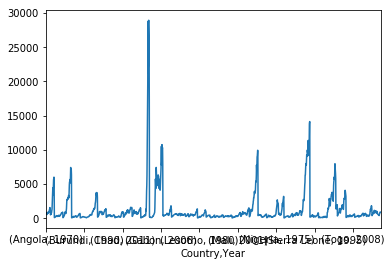

In [116]:
group_data.plot(kind='line')

In [147]:
# setting up data table
# we are interested only investigating Country, Region, Per capita GDP
analysis_table = final_merged[['Country', 'Region', 'Per capita GDP','Year']]

In [148]:
analysis_table.tail()

,Country,Region,Per capita GDP,Year
1739,Zimbabwe,SSA,768.540514,2011
1740,Zimbabwe,SSA,850.847229,2012
1741,Zimbabwe,SSA,905.485078,2013
1742,Zimbabwe,SSA,931.203924,2014
1743,Zimbabwe,SSA,890.421576,2015


In [224]:
group_analysis = analysis_table.groupby(['Country']).agg({'Per capita GDP':'mean'})

In [231]:
gdp_column = group_analysis

In [230]:
group_analysis2 = analysis_table.groupby(['Country']).agg({'Per capita GDP':'mean'})
group_analysis2.head()

,Per capita GDP
Country,
Angola,1701.670683
Benin,430.773726
Botswana,2798.869019
Burkina Faso,318.221919
Burundi,169.639283


In [232]:
gdp_column = gdp_column.reset_index()

In [233]:
gdp_column

,Year,Per capita GDP
0,1970,244.270864
1,1971,264.173091
2,1972,294.230738
3,1973,360.156807
4,1974,461.033039
5,1975,527.671029
6,1976,576.436836
7,1977,599.206065
8,1978,639.873761
9,1979,760.638047


In [234]:
gdp_column['Region'] = analysis_table['Region']

In [235]:
gdp_column.head()

,Year,Per capita GDP,Region
0,1970,244.270864,SSA
1,1971,264.173091,SSA
2,1972,294.230738,SSA
3,1973,360.156807,SSA
4,1974,461.033039,SSA


In [236]:
gdp_column.set_index('Year', drop=True, inplace=True)

In [237]:
gdp_column.head()

,Per capita GDP,Region
Year,,
1970,244.270864,SSA
1971,264.173091,SSA
1972,294.230738,SSA
1973,360.156807,SSA
1974,461.033039,SSA


In [238]:
# adding column
gdp_column['counter'] = range(0, len(gdp_column.index.values))

In [239]:
gdp_column.head()

,Per capita GDP,Region,counter
Year,,,
1970,244.270864,SSA,0
1971,264.173091,SSA,1
1972,294.230738,SSA,2
1973,360.156807,SSA,3
1974,461.033039,SSA,4


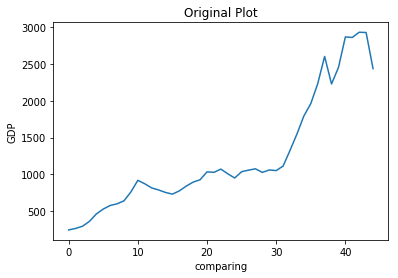

In [240]:
#plot counter(index) vs per capita gdp
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel("comparing")
ax1.set_ylabel("GDP")
ax1.set_title("Original Plot")
ax1.plot('counter','Per capita GDP', data = gdp_column)

In [241]:
# choosing same of the data
sample_data = gdp_column.sample(frac=.2, random_state=42)
sample_data.index.name = None
sample_data = sample_data.sort_values(by = ['counter'], ascending=[True])
sample_data.head()

,Per capita GDP,Region,counter
1974,461.033039,SSA,4
1978,639.873761,SSA,8
1982,815.286905,SSA,12
1995,1035.006466,SSA,25
1996,1056.685945,SSA,26


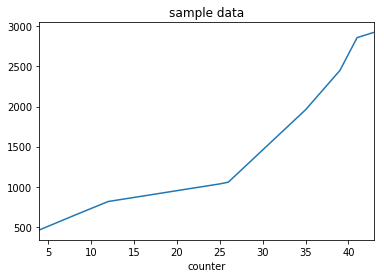

In [242]:
axes = sample_data.plot('counter', 'Per capita GDP', legend=False, title="sample data")

Text(0.5,1,'Sample data')

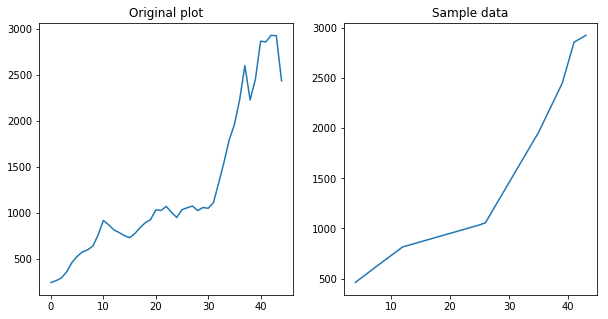

In [243]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axes[0].plot('counter','Per capita GDP', data = gdp_column)
axes[0].set_title("Original plot")
axes[1].plot('counter', 'Per capita GDP', data = sample_data)
axes[1].set_title("Sample data")

In [244]:
gdp_column.reset_index(inplace=True)

In [251]:
gdp_column.tail()

,Year,Per capita GDP,Region,counter
40,2011,2867.053181,SSA,40
41,2012,2859.741626,SSA,41
42,2013,2930.637001,SSA,42
43,2014,2927.080450,SSA,43
44,2015,2436.102496,SSA,44


Text(0,0.5,'Per capita GDP')

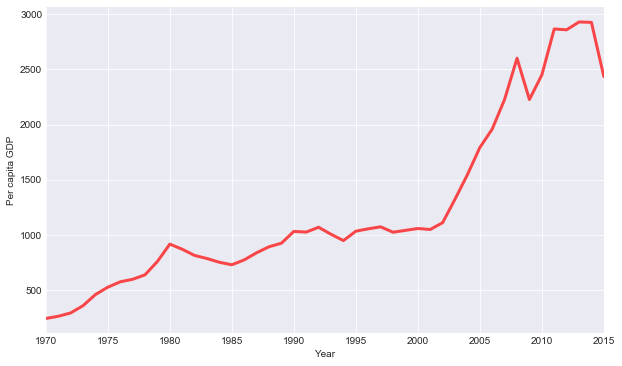

In [274]:
#time series analysis
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(gdp_column['Year'], gdp_column['Per capita GDP'], color = 'red',
        linewidth = 3, alpha = .7, label = "GDP")
ax.set_xlim(xmin=1970, xmax=2015)
ax.set_xlabel("Year")
ax.set_ylabel("Per capita GDP")

In [279]:
demo = final_merged[['Country', 'Region', 'Per capita GDP','Year', 'democ']]
demo.tail()

,Country,Region,Per capita GDP,Year,democ
1739,Zimbabwe,SSA,768.540514,2011,3.0
1740,Zimbabwe,SSA,850.847229,2012,3.0
1741,Zimbabwe,SSA,905.485078,2013,5.0
1742,Zimbabwe,SSA,931.203924,2014,5.0
1743,Zimbabwe,SSA,890.421576,2015,5.0


In [281]:
democracy = final_merged.groupby(['Year']).agg({'democ':'mean'})

In [283]:
democracy.head()

,democ
Year,
1970,1.516129
1971,1.419355
1972,1.096774
1973,0.967742
1974,0.937500


In [292]:
democracy.reset_index(inplace=True)

In [299]:
gdp_column = gdp_column.merge(democracy, on='Year')
#gdp_column.drop(['democ_x'])

In [307]:
#gdp_column.drop('democ_x', axis=1, inplace=True)
gdp_column = gdp_column.rename(columns={'democ_y':'democ'})
gdp_column.head()

,Year,Per capita GDP,Region,counter,democ
0,1970,244.270864,SSA,0,1.516129
1,1971,264.173091,SSA,1,1.419355
2,1972,294.230738,SSA,2,1.096774
3,1973,360.156807,SSA,3,0.967742
4,1974,461.033039,SSA,4,0.937500


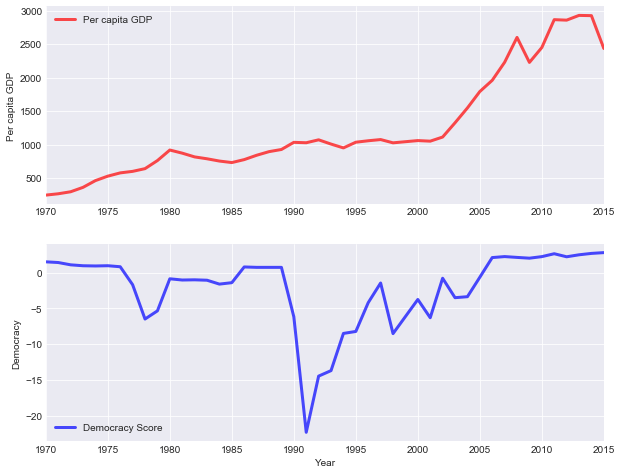

In [336]:
#time series analysis
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(211)
ax.plot(gdp_column['Year'], gdp_column['Per capita GDP'], color = 'red',
        linewidth = 3, alpha = .7, label = "Per capita GDP")
ax.set_xlim(xmin=1970, xmax=2015)
ax.set_ylabel("Per capita GDP")
plt.legend()
#--------------------------------------------------------------
ax = fig.add_subplot(212)
ax.plot(gdp_column['Year'], gdp_column['democ'], color = 'blue',
        linewidth = 3, alpha = .7, label = "Democracy Score")
#ax.plot(gdp_column['Year'])
ax.set_xlim(xmin=1970, xmax=2015)
ax.set_xlabel("Year")
ax.set_ylabel("Democracy")
plt.legend()